In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Data Preparation

In [3]:
inp_country = pd.DataFrame(pd.read_csv('Country-data.csv'))
inp_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
inp_country.shape

(167, 10)

In [5]:
inp_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
inp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# Reading the data dictionary file

inp_structure = pd.read_csv('data-dictionary.csv')
inp_structure.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [8]:
# Datatype check for the dataframe

inp_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## Checking Duplicates

In [9]:
inp_country.loc[inp_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Data Cleaning

In [10]:
inp_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### We can clearly see that their is no  NULL values .


# Exploratory Data Analytics


### Univariate Analysis

### Visulaization of Data

 Heatmap to understand the attributes dependency

(9.8, -0.8)

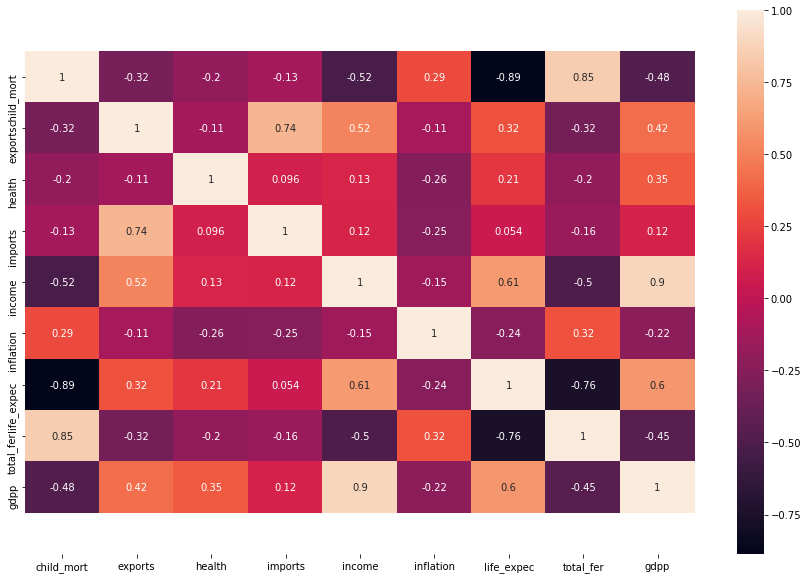

In [11]:
plt.figure(figsize = (15,10))        
ax = sns.heatmap(inp_country.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.8, top - 0.8)

#### OUTCOMES
1. Child_mortality and life_expentency are highly correlated with correlation of -0.89
2. Child_mortality and total_fertility are highly correlated with correlation of 0.85

# We will have a look on the lowest 10 countries for each factor.


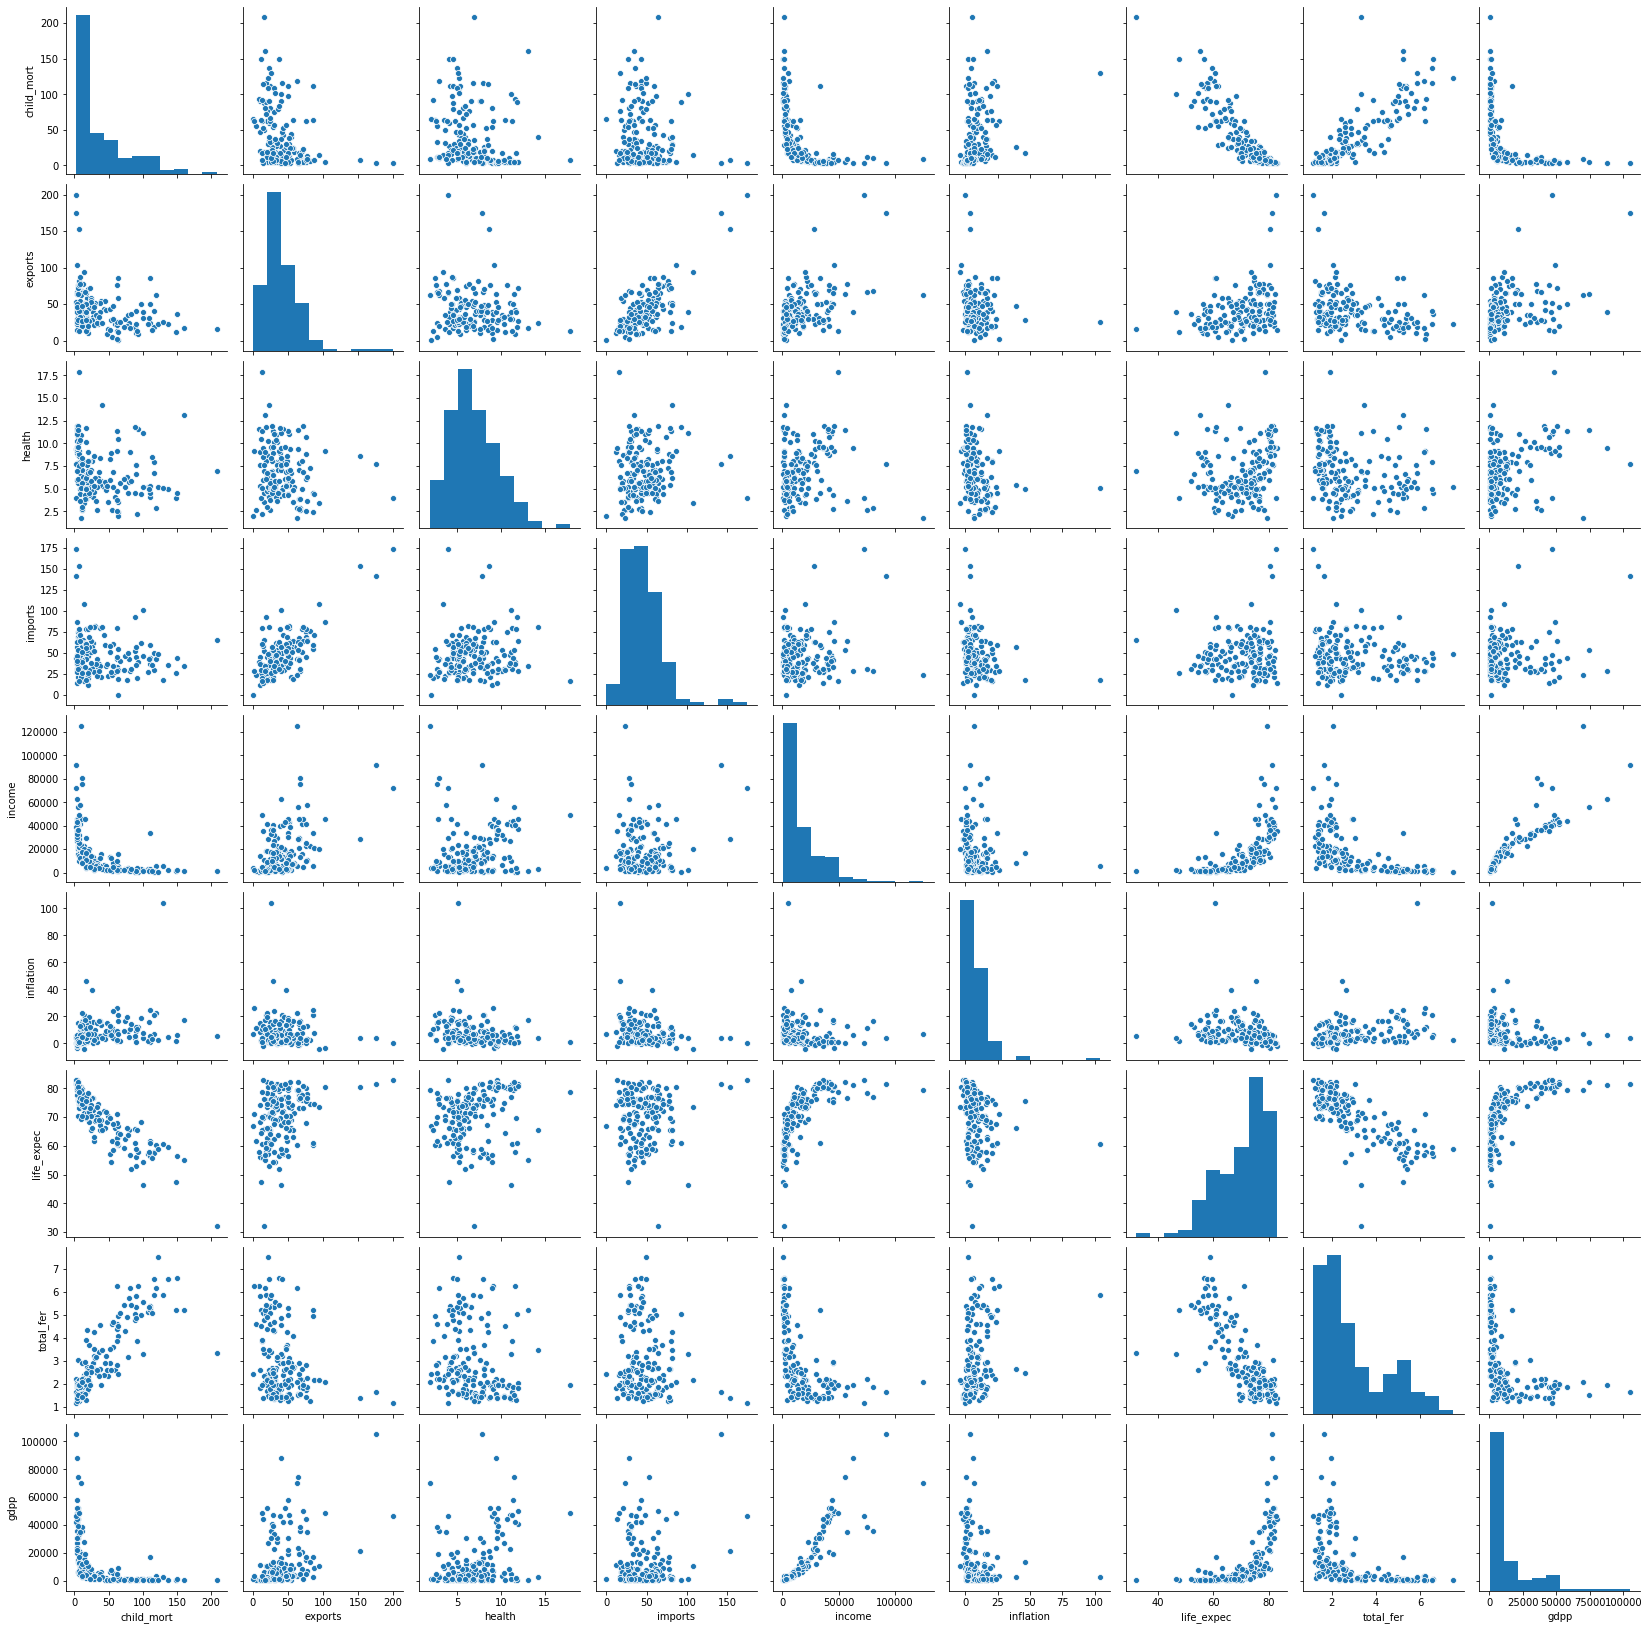

In [12]:
sns.pairplot(inp_country)

#### Derived Metrices

Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. For example Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [13]:
# Converting exports,imports and health spending percentages to absolute values.

inp_country['exports'] = inp_country['exports'] * inp_country['gdpp']/100
inp_country['imports'] = inp_country['imports'] * inp_country['gdpp']/100
inp_country['health'] = inp_country['health'] * inp_country['gdpp']/100

In [14]:
inp_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


 Dropping Country field as final dataframe will only contain data columns.

In [15]:
country_drop = inp_country.copy()
country = country_drop.pop('country')
country_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Rescaling the Features
There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)


#### Standarisation technique for scaling

In [16]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [17]:
scaler = StandardScaler()
inp_country_scaled = scaler.fit_transform(country_drop)
inp_country_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### PCA Application
By doing PCA , we remove the redundancies in the data and find the most important directions where the data was aligned.
Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, visualising complex data sets, and in many more areas.


In [18]:
pca = PCA(svd_solver='randomized', random_state=42)

In [19]:
# Lets apply PCA on the scaled data

pca.fit(inp_country_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [20]:
# PCA components created 

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

#### Variance Ratio

In [21]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

##### Variance Ratio bar plot 

Text(0, 0.5, 'Variance Ratio')

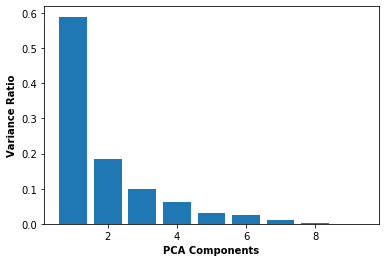

In [22]:
pt = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

###### OUTCOMES :
1. The first component variance explained is nearaboutt 60%.
2. and the second component variance explained is almost 20%.

##### Scree plot to visualize the Cumulative variance against the Number of components

Text(0, 0.5, 'Cumulative Explained Variance')

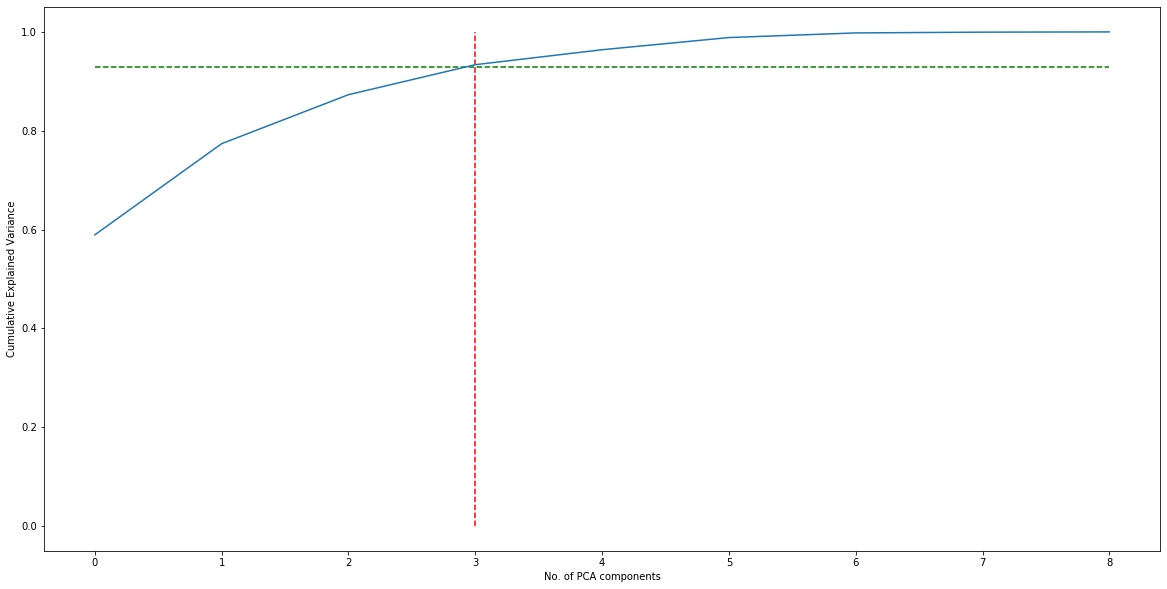

In [23]:
fig = plt.figure(figsize = (20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('No. of PCA components')
plt.ylabel('Cumulative Explained Variance')

We can clearly see that from the above Scree plot that more than 90% variance is explained by the first 3 principal components. Thus, we will use these components only going forward for Clustering process.

###### Checking  attributes that are  explained well by the pca components


In [24]:
org = list(inp_country.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

In [25]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


##### Plotting t visualization graph with PC1 and PC2


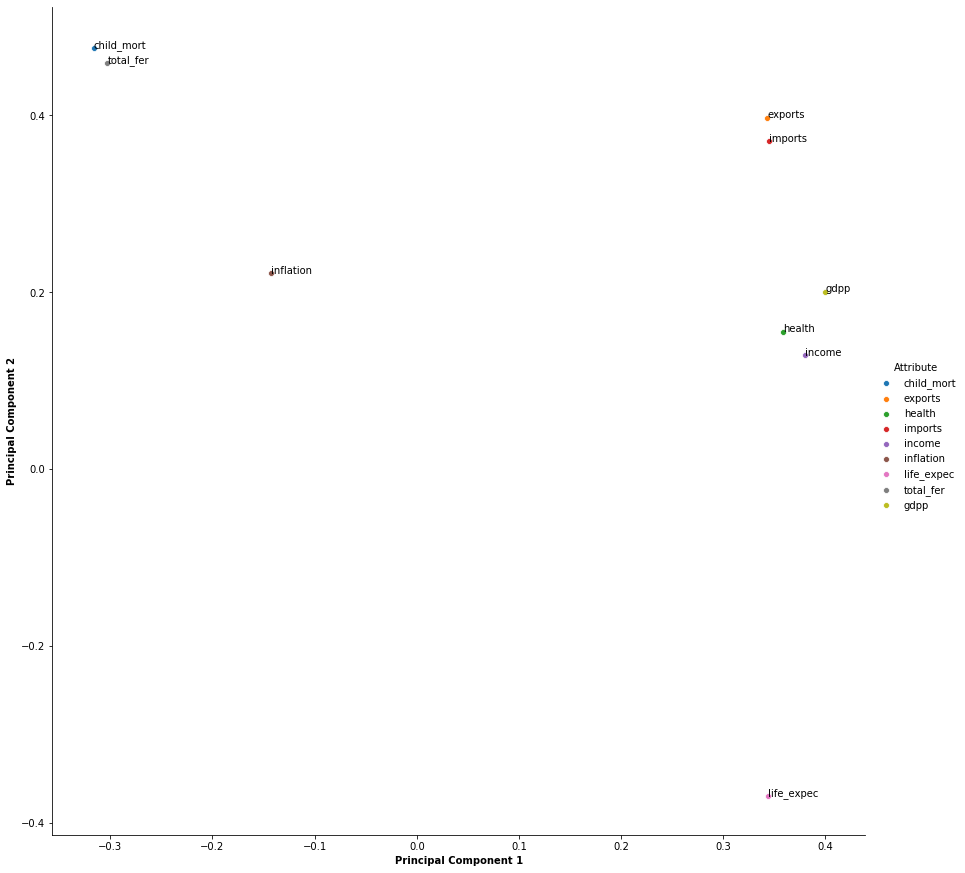

In [26]:
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=12)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

#### Outcomes :
a. The life expectency, income, gdpp and health are very well explained by PC1.

b. Imports and Exports are well explained by both the components PC1 and PC2.

c. Child mortality and total fertility are well explained by PC2.

d. Inflation is neither explained by PC1 nor with PC2

#### With PC1 and PC3

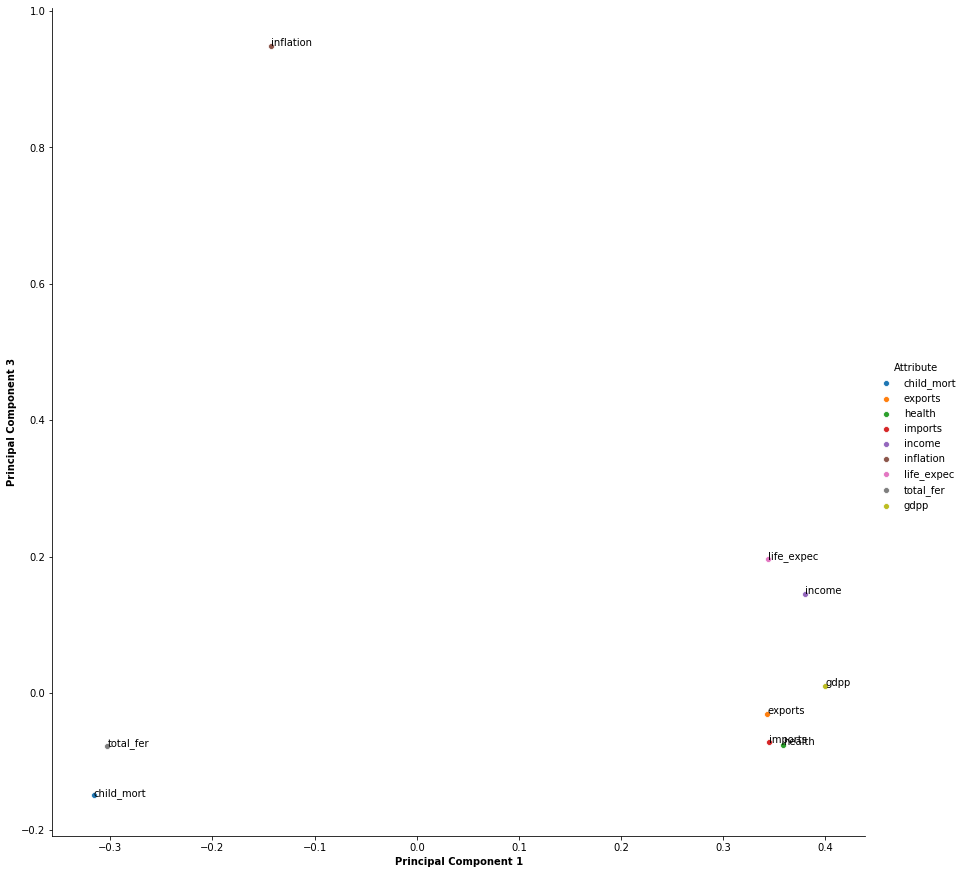

In [27]:
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=12)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

inflation is well explained by PC3.


#### As we can observe that the  90% variance is explained by 3 principal components, So we  build the dataframe using those 3 components only.



#### Building by  using Incremental PCA for better efficiency.


In [28]:
inct = IncrementalPCA(n_components=3)

In [29]:
# Fitting the scaled df on incremental pca

df_inct = inct.fit_transform(inp_country_scaled)
df_inct


array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

### Creating the new dataframe with Principal components


In [30]:
inp_pca = pd.DataFrame(df_inct, columns=["PC_1", "PC_2","PC_3"])
inp_pca_final = pd.concat([country, inp_pca], axis=1)
inp_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


### Plotting Heatmap to check the dependency in the dataset.


(3.5, -0.5)

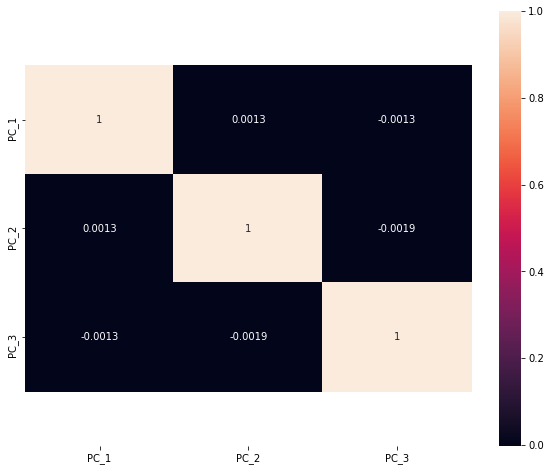

In [31]:
plt.figure(figsize = (10,8))        
ax = sns.heatmap(inp_pca_final.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

By the above HeatMap  we can clearly see that the correlation among the attributes is almost 0, Thus we can proceed with this dataframe.



### Scatter Plot to visualize the spread of data across PCA components

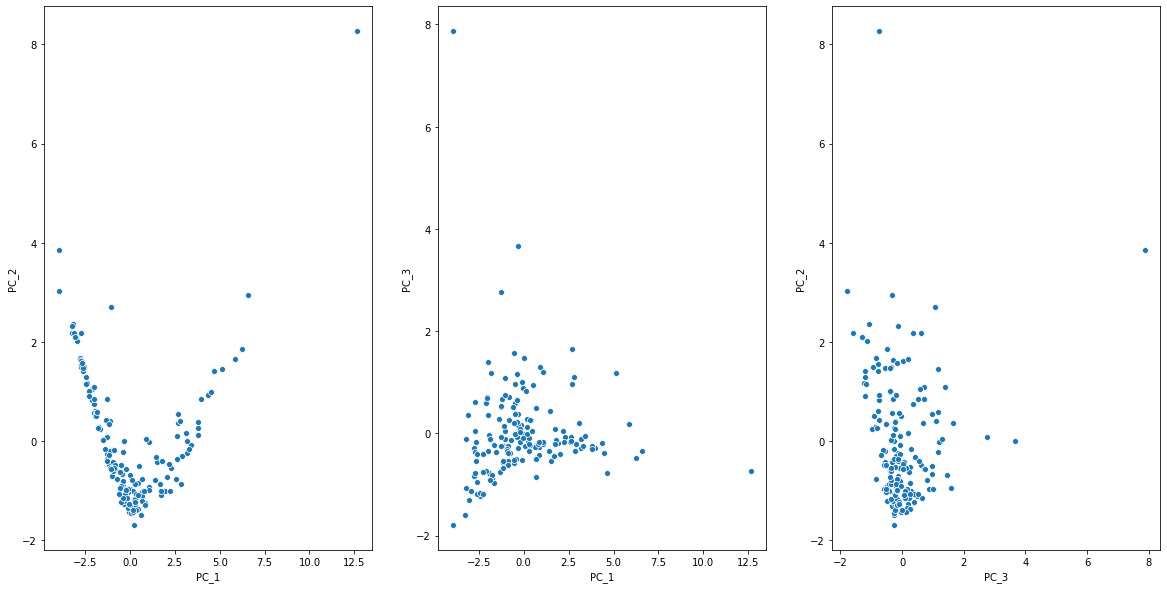

In [32]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.scatterplot(data=inp_pca_final, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=inp_pca_final, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=inp_pca_final, x='PC_3', y='PC_2')

### Outlier Analysis

 We will see how values in each columns are distributed using boxplot


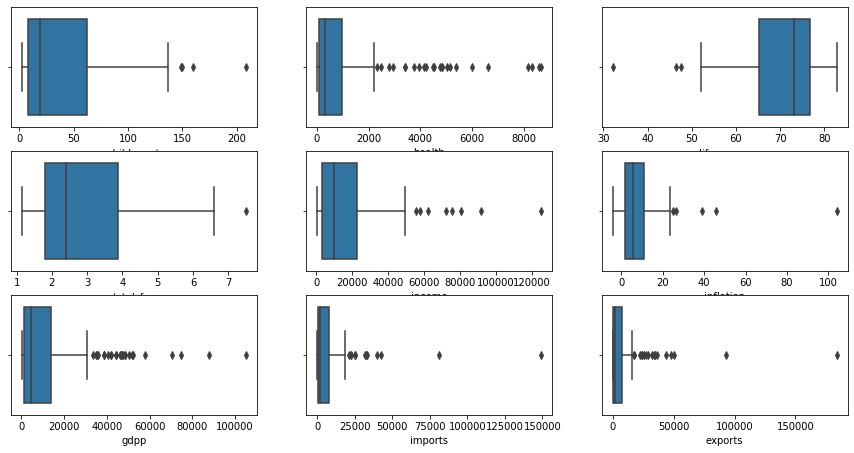

In [33]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(inp_country['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(inp_country['health'], ax = axs[0,1])
plt3 = sns.boxplot(inp_country['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(inp_country['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(inp_country['income'], ax = axs[1,1])
plt6 = sns.boxplot(inp_country['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(inp_country['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(inp_country['imports'], ax = axs[2,1])
plt9 = sns.boxplot(inp_country['exports'], ax = axs[2,2])

Text(0.5, 0, 'PC Components')

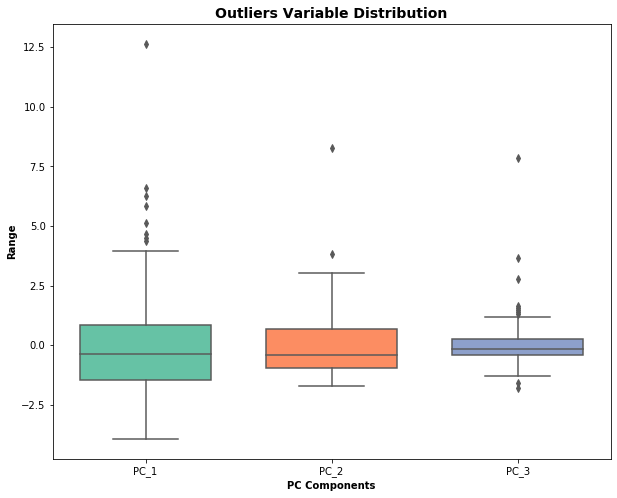

In [34]:
outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = inp_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

## Statstical Outlier 




#### For PC_1


In [35]:
Q1 = inp_pca_final.PC_1.quantile(0.05)
Q3 = inp_pca_final.PC_1.quantile(0.95)
IQR = Q3 - Q1
inp_pca_final = inp_pca_final[(inp_pca_final.PC_1 >= Q1) & (inp_pca_final.PC_1 <= Q3)]

### For PC_2

In [36]:
Q1 = inp_pca_final.PC_2.quantile(0.05)
Q3 = inp_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
inp_pca_final = inp_pca_final[(inp_pca_final.PC_2 >= Q1) & (inp_pca_final.PC_2 <= Q3)]


### For PC_3


In [37]:
Q1 = inp_pca_final.PC_3.quantile(0.05)
Q3 = inp_pca_final.PC_3.quantile(0.95)
IQR = Q3 - Q1
inp_pca_final = inp_pca_final[(inp_pca_final.PC_3 >= Q1) & (inp_pca_final.PC_3 <= Q3)]

### Plot after Outlier removal 


Text(0.5, 0, 'PC Components')

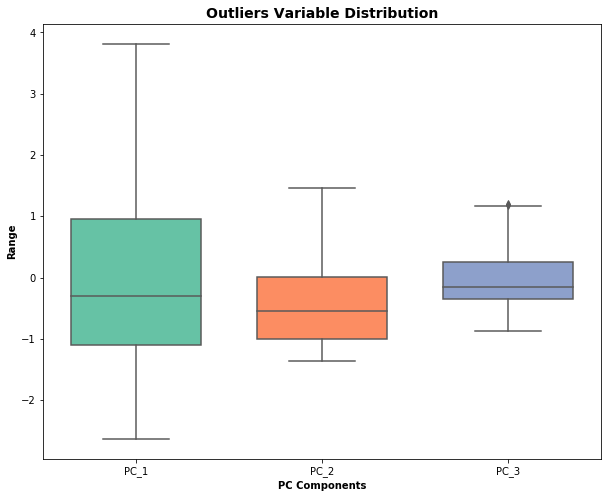

In [38]:
outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = inp_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

## Reindexing

In [39]:
inp_pca_final = inp_pca_final.reset_index(drop=True)
inp_pca_final_data = inp_pca_final.drop(['country'],axis=1)
inp_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877


# Hopkins Statistics:

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.


#### Calculating Hopkins score

In [40]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
         
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [41]:
hopkins(inp_pca_final_data)

0.7873426858975562

So we have 0.78 as a Hopkins Score . This is a good Hopkins score for Clustering.

## Model Building

### K-means clustering : 
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly.

We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. 

We repeat the process for a given number of iterations and at the end, we have our clusters.



##### Use of Elbow Method

The Elbow Method is one of the most popular methods to determine this optimal value of k. We now demonstrate the given method using the K-Means clustering technique using the Sklearn library of python.

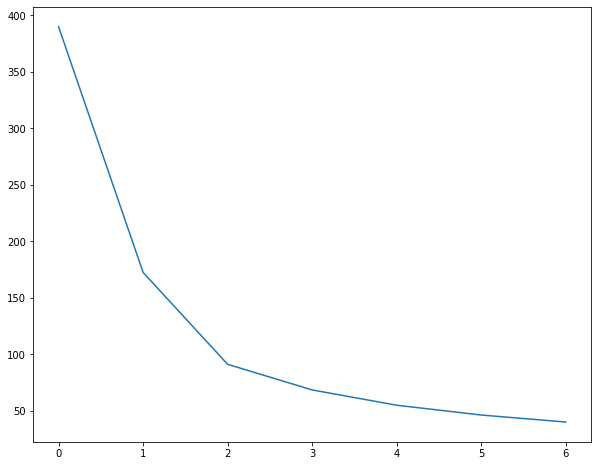

In [42]:
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(inp_pca_final_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

By the above elbow curve , we can see that ,it looks good to proceed with either 4 or 5 clusters.

### Silhouette Analysis
silhouette score= p−q / max(p,q)
 
p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [43]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(inp_pca_final_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(inp_pca_final_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4873400103541441
For n_clusters=3, the silhouette score is 0.46397714562182474
For n_clusters=4, the silhouette score is 0.3987356568367148
For n_clusters=5, the silhouette score is 0.3608535370443813
For n_clusters=6, the silhouette score is 0.3714796089348358
For n_clusters=7, the silhouette score is 0.3609446319381151
For n_clusters=8, the silhouette score is 0.3496365574997992


### With k=4 clusters

In [44]:
cluster4 = KMeans(n_clusters=4, max_iter=50, random_state= 100)
cluster4.fit(inp_pca_final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [45]:
cluster4.labels_

array([3, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 0, 1, 2, 1, 0,
       1, 1, 3, 3, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 2, 3, 3, 1, 2, 3, 0,
       1, 1, 1, 0, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 3, 2, 1, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 3, 0, 1, 1, 1, 1, 3, 1, 2, 0, 3, 0, 1, 1, 1, 0, 0,
       0, 1, 3, 1, 0, 0, 2, 3, 3, 0, 2, 1, 3, 1, 2, 1, 3, 1, 1, 0, 1, 3,
       1, 2, 2, 2, 0, 1, 1, 1, 3])

#### Assign the label to data 

In [46]:
inp_pca_final['Cluster_Id4'] = cluster4.labels_
inp_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id4
0,Afghanistan,-2.637442,1.469038,-0.541359,3
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,2


In [47]:
# Number of countries in each cluster

inp_pca_final['Cluster_Id4'].value_counts()

1    48
0    29
3    23
2    19
Name: Cluster_Id4, dtype: int64

 It seems there are good number of countries in each clusters.

##### Scatter plot on Principal components 

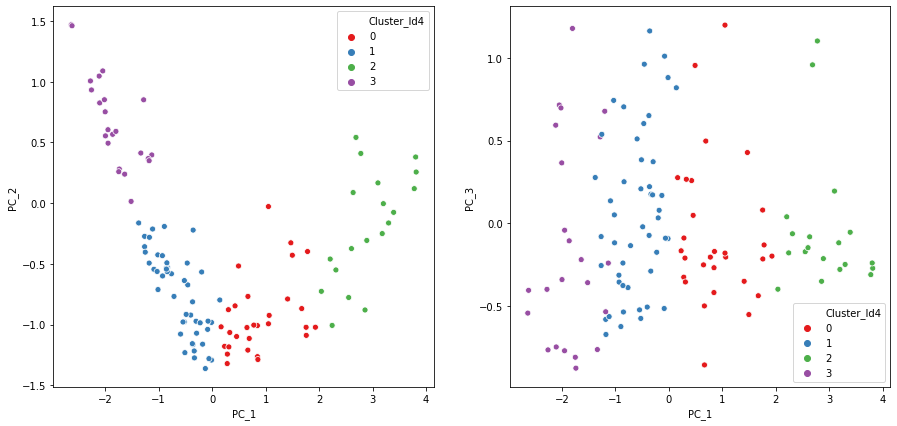

In [48]:
fig, axes = plt.subplots(1,2S, figsize=(15,7))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id4',legend='full',palette="Set1",data=inp_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id4',legend='full',palette="Set1",data=inp_pca_final,ax=axes[1])

We can see that in plot 1, their is  lot of intra-distance between the cluster elements, which is not a good sign.


Lets drop the Cluster Id created with 4 clusters and proceed with 5 clusters.

In [50]:
inp_pca_final = inp_pca_final.drop('Cluster_Id4',axis=1)

#### With k=5 clusters


In [51]:
cluster5 = KMeans(n_clusters=5, max_iter=50,random_state=100)
cluster5.fit(inp_pca_final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [52]:
# Cluster labels

cluster5.labels_

array([1, 0, 3, 0, 2, 2, 0, 3, 3, 4, 3, 0, 4, 4, 4, 1, 0, 0, 4, 2, 4, 0,
       0, 0, 1, 1, 3, 2, 3, 0, 0, 4, 0, 1, 3, 4, 2, 2, 1, 1, 0, 2, 1, 3,
       0, 4, 4, 3, 2, 4, 4, 0, 1, 3, 2, 0, 2, 4, 0, 1, 2, 4, 1, 3, 1, 0,
       3, 1, 0, 0, 2, 1, 0, 4, 0, 4, 4, 1, 4, 2, 0, 1, 0, 0, 0, 4, 3, 3,
       0, 0, 1, 4, 3, 3, 3, 1, 1, 3, 3, 0, 1, 0, 2, 4, 1, 4, 0, 0, 4, 1,
       0, 2, 2, 2, 0, 4, 4, 0, 1])

In [53]:
# assign the label

inp_pca_final['Cluster_Id'] = cluster5.labels_
inp_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,1
1,Algeria,-0.457626,-0.673301,0.961867,0
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,3
3,Armenia,-0.332692,-1.274517,0.176636,0
4,Australia,3.180362,-0.250785,-0.116877,2


In [54]:
# Number of countries in each cluster

inp_pca_final['Cluster_Id'].value_counts()

0    35
4    25
1    23
3    19
2    17
Name: Cluster_Id, dtype: int64

It seems there are good number of countries in each clusters.

#### Scatter plot on Principal components to visualize the spread of the data

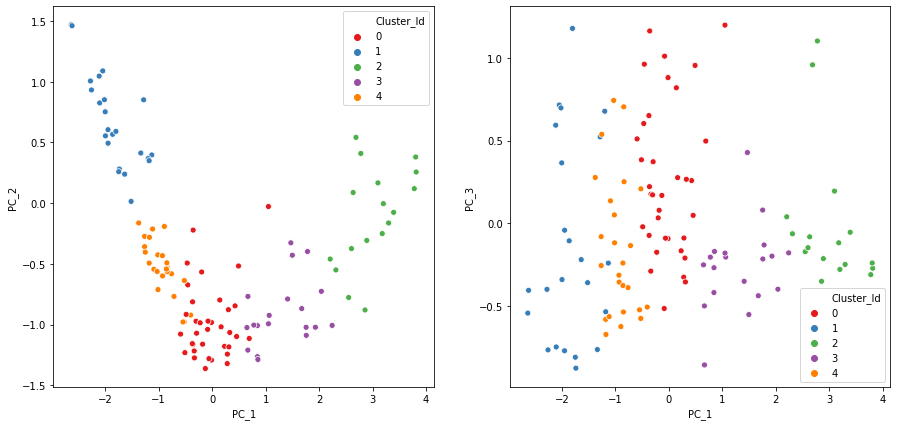

In [55]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=inp_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=inp_pca_final,ax=axes[1])

As we can see that here also we got the same issue as with 4 clusters but we got a new segment, so lets proceed with K means using 5 clusters.

### Visualize the data on the original attributes.

#### Merging the df with PCA with original Data frame

In [56]:
inp_merge = pd.merge(inp_country,inp_pca_final,on='country')
inp_merge_col = inp_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

# Creating df with mean values
cluster_child = pd.DataFrame(inp_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(inp_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(inp_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(inp_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(inp_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(inp_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(inp_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(inp_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(inp_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

inp_concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
inp_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
inp_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,17.900000,2934.328857,2790.207714,417.946200,14125.714286,8.258286,74.054286,2.085429,6943.428571
1,1,68.478261,884.774513,838.634174,135.873852,4650.869565,10.711304,62.169565,4.507391,2152.739130
2,2,5.141176,16736.111765,15324.935294,3954.500588,41705.882353,2.823647,80.476471,1.776471,40911.764706
3,3,6.900000,9200.489474,9445.805263,1489.787895,25036.842105,0.904789,76.957895,1.678947,18810.526316
4,4,37.216000,931.788741,1241.580044,130.351536,5442.800000,6.602040,69.232000,2.982000,2416.880000


In [58]:
inp_merge_col.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,1
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,3
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,0
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,2


From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country.

We have also cross checked with Principal components and found that these variables have good score in PCA.

Thus, we will proceed with analyzing these 3 components to build some meaningful clusters.

# Scatter plot on Original attributes

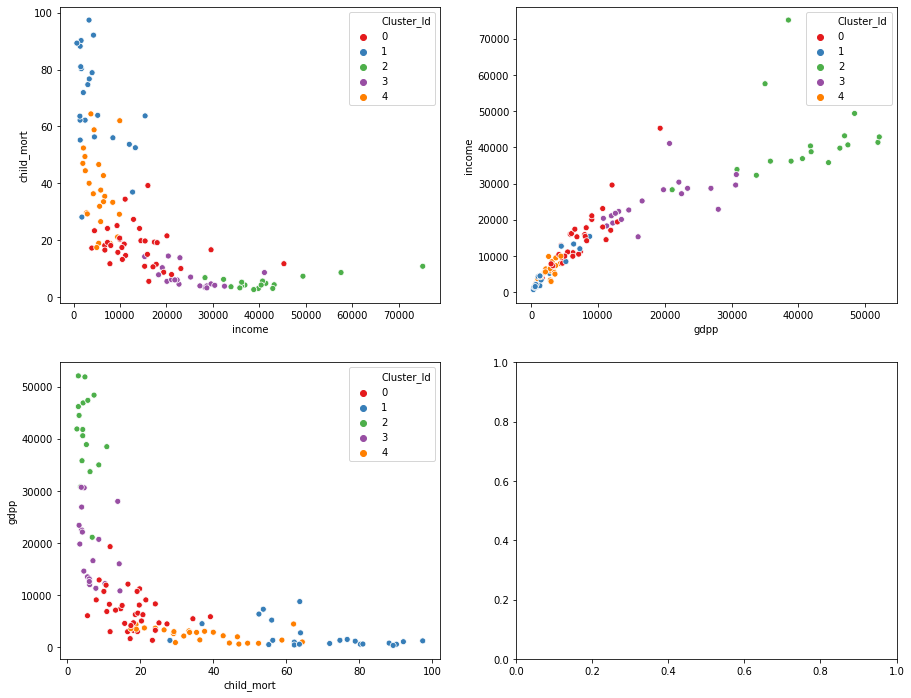

In [59]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = inp_merge_col,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = inp_merge_col,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=inp_merge_col,legend='full',palette="Set1",ax=axes[1][0])

## Box plot on Original attributes

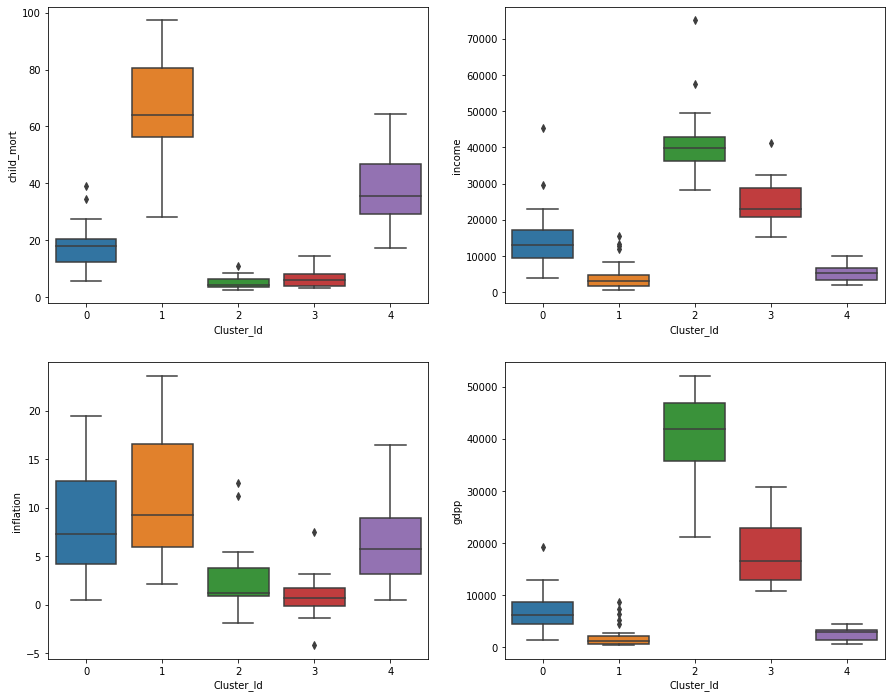

In [60]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = inp_merge_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = inp_merge_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=inp_merge_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=inp_merge_col,ax=axes[1][1])

### Outcomes: We can see that

1. Child Mortality is highest for Cluster 0 and Cluster 3.These clusters need some aid.

2. Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. 

3. Income per capita and gdpp seems lowest for countries in clusters 0 and 3. Hence, these countries need some help.


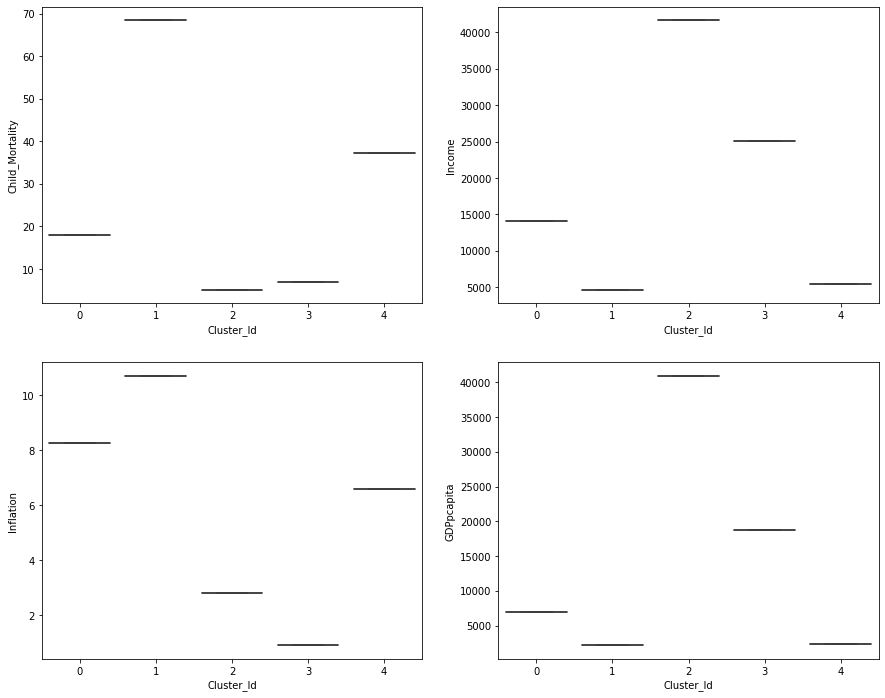

In [61]:
# Box plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'Child_Mortality', data = inp_concat,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'Income', data = inp_concat,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'Inflation', data=inp_concat,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'GDPpcapita', data=inp_concat,ax=axes[1][1])


##### Countries in Cluster 0

In [63]:
inp_merge_col[inp_merge_col['Cluster_Id']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
1,Algeria,27.3,1712.64,1400.44,185.982,12900,16.10,76.5,2.89,4460,0
3,Armenia,18.1,669.76,1458.66,141.680,6700,7.77,73.3,1.69,3220,0
6,Azerbaijan,39.2,3171.12,1208.88,343.392,16000,13.80,69.1,1.92,5840,0
11,Belarus,5.5,3099.42,3889.35,338.283,16200,15.10,70.4,1.49,6030,0
16,Brazil,19.8,1198.40,1321.60,1009.120,14500,8.41,74.2,1.80,11200,0
17,Bulgaria,10.8,3433.68,3625.20,469.908,15300,1.11,73.9,1.57,6840,0
21,Chile,8.7,4863.30,4037.70,1026.840,19400,8.96,79.1,1.88,12900,0
22,China,15.7,1199.28,1030.56,231.192,9530,6.94,74.6,1.59,4560,0
23,Colombia,18.6,993.75,1112.50,474.375,10900,3.86,76.4,2.01,6250,0
29,Dominican Republic,34.4,1237.15,1814.85,338.990,11100,5.44,74.6,2.60,5450,0


### Countries in Cluster 3

In [64]:
inp_merge_col[inp_merge_col['Cluster_Id']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
2,Antigua and Barbuda,10.3,5551.0,7185.8,735.66,19100,1.440,76.8,2.13,12200,3
7,Bahamas,13.8,9800.0,12236.0,2209.20,22900,-0.393,73.8,1.86,28000,3
8,Bahrain,8.6,14386.5,10536.3,1028.79,41100,7.440,76.0,2.16,20700,3
10,Barbados,14.2,6320.0,7792.0,1275.20,15300,0.321,76.7,1.78,16000,3
26,Croatia,5.5,5076.0,5143.5,1047.60,20100,0.821,76.3,1.55,13500,3
28,Czech Republic,3.4,13068.0,12454.2,1560.24,28300,-1.430,77.5,1.51,19800,3
34,Estonia,4.5,10964.6,10030.2,880.38,22700,1.740,76.0,1.72,14600,3
43,Greece,3.9,5944.9,8258.3,2770.70,28700,0.673,80.4,1.48,26900,3
47,Hungary,6.0,10715.8,10021.5,960.23,22300,2.330,74.5,1.25,13100,3
53,Israel,4.6,10710.0,10067.4,2334.78,29600,1.770,81.4,3.03,30600,3


## Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

-> Divisive

-> Agglomerative

In [65]:
inp_pca_final_data.head()

,PC_1,PC_2,PC_3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,3.180362,-0.250785,-0.116877


### Single linkage

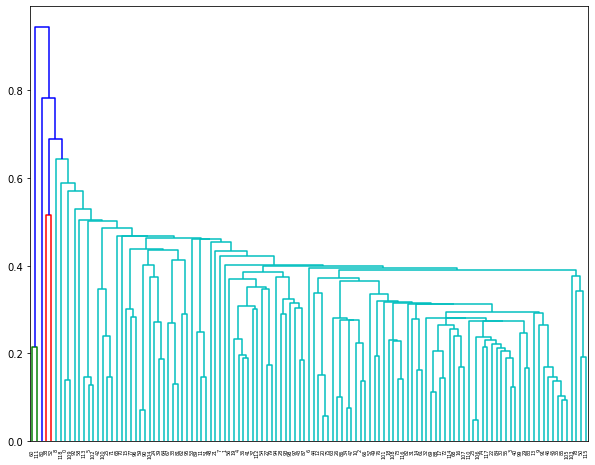

In [69]:
merg1 = linkage(inp_pca_final_data, method='single',metric='euclidean')
dendrogram(merg1)
plt.show()

### Complete Linkage

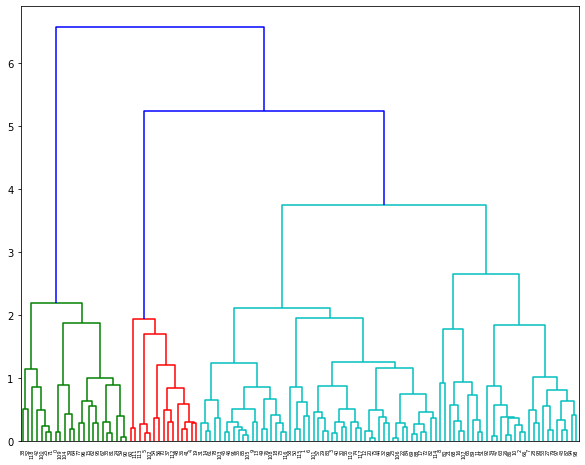

In [68]:
merg2 = linkage(inp_pca_final_data, method='complete',metric='euclidean')
dendrogram(merg2)
plt.show()

In [70]:
pca_hc = inp_pca_final.copy()
pca_hc = pca_hc.drop('Cluster_Id',axis=1)
pca_hc.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877


In [72]:
# Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(merg2, n_clusters = 4).reshape(-1,))
inp_hc = pd.concat([pca_hc, clusterCut], axis=1)
inp_hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Cluster_Id']
inp_hc.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,3


#### Scatter plot on Principal components

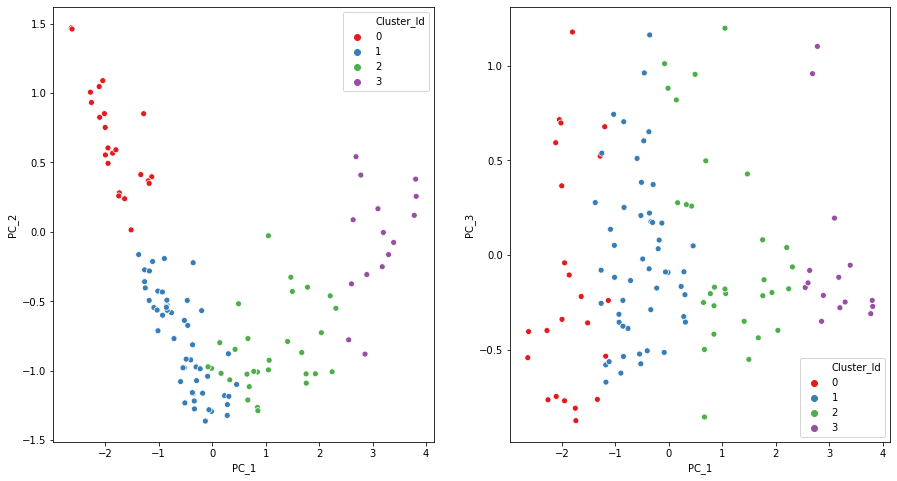

In [73]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=inp_hc,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=inp_hc,ax=axes[1])

Cluster 4 seems to be not properly formed in Plot 1.

#### Merging the df with PCA with original data frame

In [74]:
merge_hc = pd.merge(inp_country,inp_hc,on='country')
merge_col_hc = inp_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]


In [75]:
merge_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,1
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,3
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,0
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,2


### Scatter plot on Original attributes

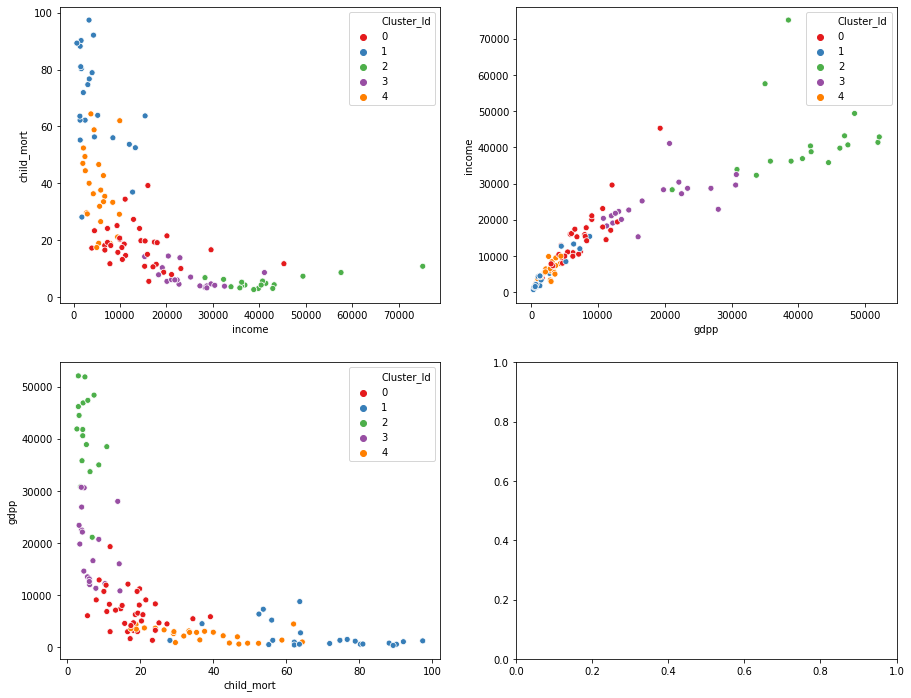

In [76]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = merge_col_hc,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = merge_col_hc,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=merge_col_hc,legend='full',palette="Set1",ax=axes[1][0])

### NOTE :
a. From the above we have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical. 

b. The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial.

So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.

# Final Step


### Analysis

We got Cluster 0 and Cluster 3 which are in need of aid.

In [77]:
inp_clus0 = inp_merge_col[inp_merge_col['Cluster_Id'] ==0]

In [78]:
inp_clus3 = inp_merge_col[inp_merge_col['Cluster_Id'] ==3]

List of countries which need help


In [79]:

inp_countries_need = inp_clus0.append(inp_clus3)

In [80]:
inp_countries_need.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
1,Algeria,27.3,1712.64,1400.44,185.982,12900,16.10,76.5,2.89,4460,0
3,Armenia,18.1,669.76,1458.66,141.680,6700,7.77,73.3,1.69,3220,0
6,Azerbaijan,39.2,3171.12,1208.88,343.392,16000,13.80,69.1,1.92,5840,0
11,Belarus,5.5,3099.42,3889.35,338.283,16200,15.10,70.4,1.49,6030,0
16,Brazil,19.8,1198.40,1321.60,1009.120,14500,8.41,74.2,1.80,11200,0


In [81]:
inp_countries_need.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,14.029630,5139.089074,5131.992037,795.075685,17964.814815,5.670944,75.075926,1.942407,11118.888889,1.055556
std,8.036934,4098.754855,3823.628193,709.033313,8918.765618,5.544451,3.169307,0.479166,7561.114190,1.446096
min,3.200000,638.960000,1030.560000,89.604000,3910.000000,-4.210000,68.400000,1.230000,1310.000000,0.000000
25%,7.200000,1613.957500,1588.022500,338.459750,10600.000000,1.207500,73.325000,1.555000,5547.500000,0.000000
50%,14.000000,4052.470000,3757.695000,477.187500,17250.000000,4.150000,74.650000,1.900000,9070.000000,0.000000
75%,19.175000,7834.125000,8035.900000,1005.252500,22600.000000,8.515000,76.775000,2.215000,13400.000000,3.000000
max,39.200000,15046.200000,14718.600000,2928.780000,45300.000000,19.500000,81.900000,3.030000,30700.000000,3.000000


We have removed few countries during outlier treatment but we might have dropped some countries which might be in need of help. Let's iterate our final list based on the information from the clusters which were in need of aid.ie, Cluster 3 and Cluster 4

In [82]:
final_list = inp_country[inp_country['child_mort']>53]
final_list

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530
17,Benin,111.0,180.40400,31.0780,281.976000,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.40000,38.7550,170.200000,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.82000,67.2030,353.700000,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446
32,Chad,150.0,330.09600,40.6341,390.195000,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.88500,34.6819,397.573000,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.27400,26.4194,165.664000,609,20.800,57.5,6.54,334


In [83]:
final_list.shape

(48, 10)

In [84]:
final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000
mean,93.020833,848.153665,97.516423,754.169835,3695.062500,11.619479,59.550000,4.912083,1797.50000
std,32.420397,2266.219395,149.219608,1509.623708,5325.996802,15.406371,6.552635,1.148607,2852.82954
min,53.700000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,2.410000,231.00000
25%,63.850000,101.630250,31.969950,188.805500,1390.000000,3.792500,56.725000,4.345000,551.50000
50%,89.750000,188.290000,48.726500,313.857000,1900.000000,8.215000,60.250000,5.055000,932.00000
75%,111.000000,417.915000,72.785000,571.837500,3785.000000,16.225000,63.850000,5.597500,1377.50000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.00000


#### Step 1

By above we can see  that the mean income is 3695 for the selected clusters and hence.
 
Let's take all the countries with less than this income .

In [86]:
f_list1 = final_list[final_list['income']<=3695]
f_list1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220


In [87]:
f_list1.shape

(35, 10)

In [88]:
f_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,98.720000,190.761400,56.936277,352.976029,1735.800000,8.491286,58.377143,5.252571,831.200000
std,32.886988,159.715094,56.727776,280.167208,769.189482,6.690649,6.957057,0.897743,606.557199
min,55.200000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000
25%,75.700000,80.351500,31.512200,170.534000,1215.000000,2.790000,56.250000,4.810000,470.500000
50%,90.500000,131.985000,41.917400,254.560000,1540.000000,6.390000,58.700000,5.210000,648.000000
75%,112.500000,224.584500,57.857500,400.286500,2135.000000,12.200000,62.000000,5.765000,1085.000000
max,208.000000,617.320000,328.320000,1190.510000,3370.000000,26.500000,71.100000,7.490000,3600.000000


### Step 2

We observed that mean gdpp is 831 for the selected clusters and hence 

Now we will the countries with less than this gdpp .

In [90]:
f_list2 = f_list1[f_list1['gdpp']<=831]
f_list2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.600,61.7,4.61,482
56,Gambia,80.3,133.7560,31.9778,239.974,1660,4.300,65.5,5.71,562
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648


In [91]:
f_list2.shape

(23, 10)

In [92]:
f_list2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,104.360870,105.403652,34.362961,214.769304,1296.652174,7.751957,57.360870,5.414783,521.217391
std,34.974806,49.710647,12.476614,85.192472,392.004361,5.424688,6.871598,0.858327,146.258475
min,55.200000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,3.330000,231.000000
25%,84.600000,67.296000,26.607700,167.282000,974.000000,3.420000,55.900000,4.945000,416.000000
50%,93.600000,103.250000,34.681900,192.544000,1390.000000,6.810000,58.000000,5.340000,547.000000
75%,116.000000,132.870500,42.053800,264.066000,1520.000000,11.100000,60.800000,5.845000,621.500000
max,208.000000,196.344000,59.115000,428.314000,2090.000000,20.800000,65.900000,7.490000,769.000000


### Final List of countries which are in need of the aid based on socio-economic factors.

In [94]:
f_list2['country']

0                   Afghanistan
17                        Benin
25                 Burkina Faso
26                      Burundi
31     Central African Republic
36                      Comoros
37             Congo, Dem. Rep.
50                      Eritrea
56                       Gambia
63                       Guinea
64                Guinea-Bissau
66                        Haiti
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
106                  Mozambique
112                       Niger
126                      Rwanda
132                Sierra Leone
147                    Tanzania
150                        Togo
155                      Uganda
Name: country, dtype: object

# BarPlot 


For the countries which are in need of aid

For Child Mortality 

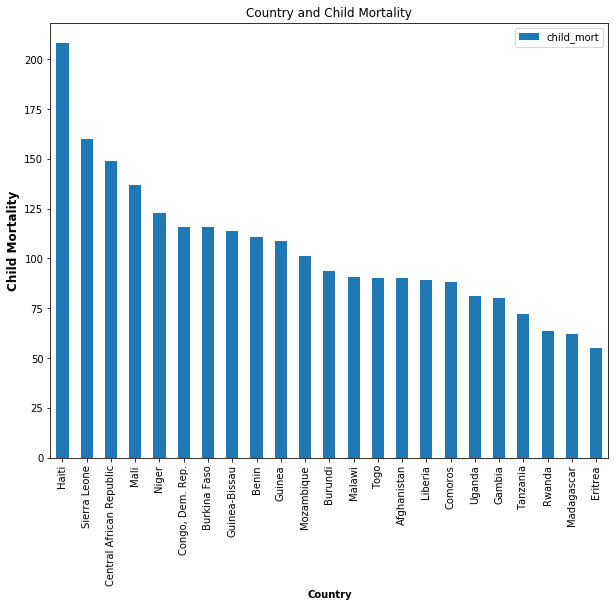

In [95]:
list_a = pd.DataFrame(f_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
list_a.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

### For Per Capita Income

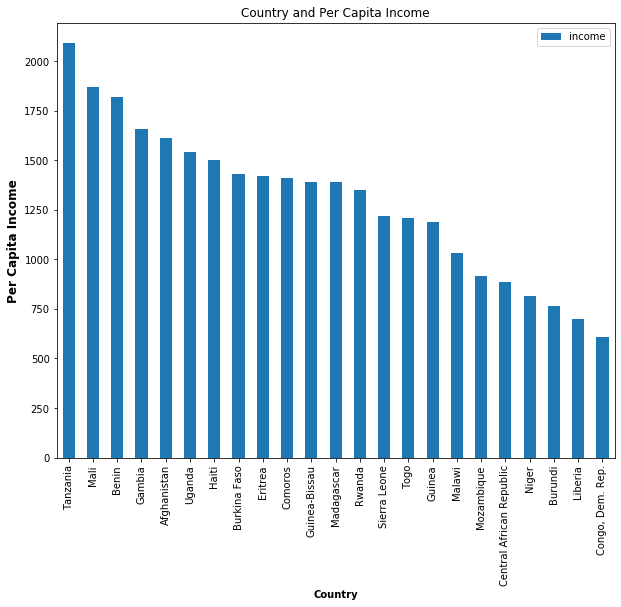

In [96]:
list_b = pd.DataFrame(f_list2.groupby(['country'])['income'].mean().sort_values(ascending = False))
list_b.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

For Per Capita GDP

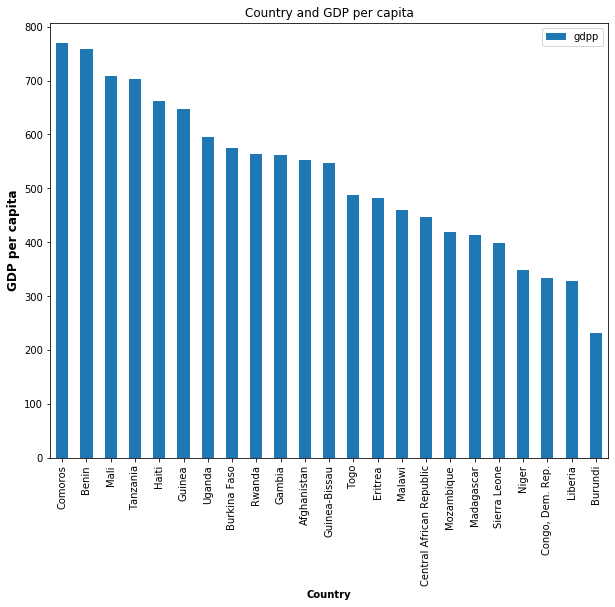

In [97]:
list_gdp = pd.DataFrame(f_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

## Closing Statement

In this scenario :

1. We have used PCA above to reduce the variables involved and then done the clustering of countries based on those Principal components.

2. Then later we identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that.

3. Based on those clusters we have identified the below list of countries which are in dire need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.

# Final countries list's

In [98]:
f_list2.reset_index(drop=True).country

0                  Afghanistan
1                        Benin
2                 Burkina Faso
3                      Burundi
4     Central African Republic
5                      Comoros
6             Congo, Dem. Rep.
7                      Eritrea
8                       Gambia
9                       Guinea
10               Guinea-Bissau
11                       Haiti
12                     Liberia
13                  Madagascar
14                      Malawi
15                        Mali
16                  Mozambique
17                       Niger
18                      Rwanda
19                Sierra Leone
20                    Tanzania
21                        Togo
22                      Uganda
Name: country, dtype: object

## Recommendations

Countries on which we require to focus more are :

    {Afghanistan,Benin,Burkina Faso,Burundi,Central African Republic,Comoros,Congo-Dem. Rep,Eritrea,Gambia,Guinea,                      Guinea-Bissau ,Haiti,Liberia,Madagascar,Malawi,Mali,Mozambique,Niger,Rwanda,Sierra Leone,Tanzania,Togo,Uganda}

